True parameters:
 a: 2.5, b: -1.3, c: 4.7
Fitted parameters:
 a: 2.4829137345562806, b: -1.264034429337382, c: 4.655305013717284


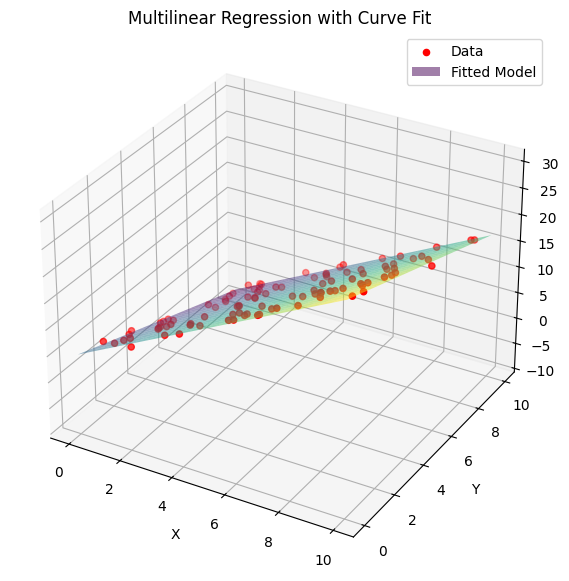

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.optimize import curve_fit # linear regression
from sklearn.svm import SVR # support vector regression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(42)  # For reproducibility
x_data = np.random.uniform(0, 10, 100)  # Random data for x
y_data = np.random.uniform(0, 10, 100)  # Random data for y

# True parameters for generating the dependent variable z
a_true, b_true, c_true = 2.5, -1.3, 4.7
noise = np.random.normal(0, 0.5, 100)  # Adding some noise

z_data = a_true * x_data + b_true * y_data + c_true + noise

# Define the model for curve fitting
def model(X, a, b, c):
    x, y = X  # X is a tuple (x, y)
    return a * x + b * y + c

# Fit the model using curve_fit
initial_guess = [1, 1, 1]  # Initial guess for a, b, c
params, covariance = curve_fit(model, (x_data, y_data), z_data, p0=initial_guess)

# Extract the fitted parameters
a_fit, b_fit, c_fit = params
print(f"True parameters:\n a: {a_true}, b: {b_true}, c: {c_true}")
print(f"Fitted parameters:\n a: {a_fit}, b: {b_fit}, c: {c_fit}")

z_pred = model((x_data, y_data), a_fit, b_fit, c_fit)
mse = mean_squared_error(z_data, z_pred)
print(f"Mean Squared Error (MSE): {mse:.3f}")

r2 = r2_score(z_data, z_pred)
print(f"R-squared (R^2): {r2:.3f}")

# Plot the data and the fitted surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the data
ax.scatter(x_data, y_data, z_data, c='r', label='Data')

# Plot the fitted plane
x_grid, y_grid = np.meshgrid(np.linspace(0, 10, 20), np.linspace(0, 10, 20))
z_grid = a_fit * x_grid + b_fit * y_grid + c_fit
ax.plot_surface(x_grid, y_grid, z_grid, alpha=0.5, cmap='viridis', label='Fitted Model')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.title('Multilinear Regression with Curve Fit')
plt.show()
